####  This code generates the Figures 7, 8, and 9, and the data for the Table 5 in the manuscript.


#### Required libraries

In [1]:
#Required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Required functions

In [2]:
def eta1(U,dx):  # Invariant: first quantity
    V = U[::2]
    W = U[1::2]
    return dx*np.sum(V**2+W**2)

def eta2(U,dx,q):   # Invariant: second quantity
    V = U[::2]
    W = U[1::2]
    return np.sum((np.diff(V)**2+np.diff(W)**2)/dx - 0.5*q*dx*(V[:-1]**2+W[:-1]**2)**2)

#### Load data

In [3]:
# choose a particular case here
#----------------------------------------------------------#                            
#q = 8; sol = 2; inv = 2                                    #
q = 18; sol = 3; inv = 2                                  #
#----------------------------------------------------------#

# Different cases
if q == 8 and sol == 2 and inv == 2: 
    xL = -35; xR = 35; L = xR-xL; m1 = 16; N = L*m1; t0 = 0; DT = [0.01, 0.05]; SP_DT = [0.05,0.05]; T = 5
    eqn = 'NLS_q%d_Sol%d_Inv%d'%(q,sol,inv)  
elif q == 18 and sol == 3 and inv == 2: 
    xL = -35; xR = 35; L = xR-xL; m1 = 32; N = L*m1; t0 = 0; DT = [0.01,0.01]; SP_DT = [0.05,0.05]; T = 5
    eqn = 'NLS_q%d_Sol%d_Inv%d'%(q,sol,inv)
    
Data_Folder = 'Data'; Fig_Folder = 'Figures';

# Data for FEM-ImEx(MR)(EC)
MR_EC_df = pd.read_csv("./Data/%s/%s_m%d_T%1.1f_MR_EC_Mthd_Data.csv"%(eqn,eqn,m1,T),index_col=[0])
a_MR_EC_TS = np.load("./Data/%s/%s_m%d_T%1.1f_MR_EC_Tot_Steps.npy"%(eqn,eqn,m1,T), allow_pickle=True); MR_EC_TS =list(a_MR_EC_TS )
a_MR_EC_dts = np.load("./Data/%s/%s_m%d_T%1.1f_MR_EC_Var_Time_Steps.npy"%(eqn,eqn,m1,T), allow_pickle=True); MR_EC_dts=list( a_MR_EC_dts)
a_MR_EC_tt = np.load("./Data/%s/%s_m%d_T%1.1f_MR_EC_Time.npy"%(eqn,eqn,m1,T), allow_pickle=True); MR_EC_tt=list(a_MR_EC_tt)
a_MR_EC_uu = np.load("./Data/%s/%s_m%d_T%1.1f_MR_EC_NumSol.npy"%(eqn,eqn,m1,T), allow_pickle=True); MR_EC_uu=list(a_MR_EC_uu)
a_MR_EC_uu_ex = np.load("./Data/%s/%s_m%d_T%1.1f_MR_EC_TrueSol.npy"%(eqn,eqn,m1,T), allow_pickle=True); MR_EC_uu_ex = list(a_MR_EC_uu_ex)

# Data for FEM-ImEx(MR)
MR_df = pd.read_csv("./Data/%s/%s_m%d_T%1.1f_MR_Mthd_Data.csv"%(eqn,eqn,m1,T),index_col=[0])
a_MR_TS = np.load("./Data/%s/%s_m%d_T%1.1f_MR_Tot_Steps.npy"%(eqn,eqn,m1,T), allow_pickle=True); MR_TS =list(a_MR_TS )
a_MR_tt = np.load("./Data/%s/%s_m%d_T%1.1f_MR_Time.npy"%(eqn,eqn,m1,T), allow_pickle=True); MR_tt=list(a_MR_tt)
a_MR_uu = np.load("./Data/%s/%s_m%d_T%1.1f_MR_NumSol.npy"%(eqn,eqn,m1,T), allow_pickle=True); MR_uu=list(a_MR_uu)

# Data for FEM-ImEx
B_df = pd.read_csv("./Data/%s/%s_m%d_T%1.1f_B_Mthd_Data.csv"%(eqn,eqn,m1,T),index_col=[0])
a_B_tt = np.load("./Data/%s/%s_m%d_T%1.1f_B_Time.npy"%(eqn,eqn,m1,T), allow_pickle=True); B_tt=list(a_B_tt)
a_B_uu = np.load("./Data/%s/%s_m%d_T%1.1f_B_NumSol.npy"%(eqn,eqn,m1,T), allow_pickle=True); B_uu=list(a_B_uu)
a_B_uu_ex = np.load("./Data/%s/%s_m%d_T%1.1f_B_TrueSol.npy"%(eqn,eqn,m1,T), allow_pickle=True); B_uu_ex = list(a_B_uu_ex)

# Data for SP-Splitting
SP_df = pd.read_csv("./Data/%s/%s_m%d_T%1.1f_SP_Mthd_Data.csv"%(eqn,eqn,m1,T),index_col=[0])
a_SP_tt = np.load("./Data/%s/%s_m%d_T%1.1f_SP_Time.npy"%(eqn,eqn,m1,T), allow_pickle=True); SP_tt=list(a_SP_tt)
a_SP_uu = np.load("./Data/%s/%s_m%d_T%1.1f_SP_NumSol.npy"%(eqn,eqn,m1,T), allow_pickle=True); SP_uu=list(a_SP_uu)


In [4]:
SP_df

,Mthds_SP,SP: dt,Domain,m,t0,tf,q
0,S2,0.01,"[-35,35]",2240,0,5.0,18
1,AK4,0.01,"[-35,35]",2240,0,5.0,18


In [5]:
MR_EC_df

,Mthds_MR_EC,Init: dt,Domain,m,t0,tf,q,R: ier = 1,R: ier = 5,R: ier = else
0,ImEx3(MR)(EC),0.01,"[-35,35]",2240,0,5.0,18,523.0,32.0,3.0
1,ImEx4(MR)(EC),0.01,"[-35,35]",2240,0,5.0,18,379.0,57.0,0.0


In [6]:
# Domain
xL = int(eval(MR_EC_df['Domain'][0])[0]) # left end point of the domain 
xR = int(eval(MR_EC_df['Domain'][0])[1]) # right end point of the domain 
m = MR_EC_df['m'][0] # number of grid points
x = np.linspace(xL,xR,m)
dx = x[1] - x[0]

In [7]:
B_df

,Mthds_B,B: dt,Domain,m,t0,tf,q
0,ImEx3,0.01,"[-35,35]",2240,0,5.0,18
1,ImEx4,0.01,"[-35,35]",2240,0,5.0,18


In [8]:
# Taking absolute value of true solutions corresponding to FEM-ImEx(MR)(EC) methods
Mod_MR_EC_uu_ex = []; 
for i in range(len(MR_EC_df['Mthds_MR_EC'])):
    Mod_MR_EC_u_ex = [];
    for j, u in enumerate(MR_EC_uu_ex[i]):
        rV = u[::2]; rW = u[1::2]; r_un = np.sqrt(rV**2+rW**2)
        Mod_MR_EC_u_ex.append(r_un)
    Mod_MR_EC_uu_ex.append(Mod_MR_EC_u_ex)

# Taking absolute value of true solutions corresponding to FEM-ImEx methods
Mod_B_uu_ex = []; 
for i in range(len(B_df['Mthds_B'])):
    Mod_B_u_ex = [];
    for j, u in enumerate(B_uu_ex[i]):
        bV = u[::2]; bW = u[1::2]; b_un = np.sqrt(bV**2+bW**2)
        Mod_B_u_ex.append(b_un)
    Mod_B_uu_ex.append(Mod_B_u_ex)

In [9]:
# Taking absolute value of numerical solutions corresponding to FEM-ImEx(MR)(EC) methods
Mod_MR_EC_uu = []; 
for i in range(len(MR_EC_df['Mthds_MR_EC'])):
    Mod_MR_EC_u = [];
    for j, u in enumerate(MR_EC_uu[i]):
        rV = u[::2]; rW = u[1::2]; r_un = np.sqrt(rV**2+rW**2)
        Mod_MR_EC_u.append(r_un)
    Mod_MR_EC_uu.append(Mod_MR_EC_u)
    
# Taking absolute value of numerical solutions corresponding to FEM-ImEx(MR) methods
Mod_MR_uu = []; 
for i in range(len(MR_df['Mthds_MR'])):
    Mod_MR_u = [];
    for j, u in enumerate(MR_uu[i]):
        rV = u[::2]; rW = u[1::2]; r_un = np.sqrt(rV**2+rW**2)
        Mod_MR_u.append(r_un)
    Mod_MR_uu.append(Mod_MR_u)

# Taking absolute value of numerical solutions corresponding to FEM-ImEx methods
Mod_B_uu = []; 
for i in range(len(B_df['Mthds_B'])):
    Mod_B_u = [];
    for j, u in enumerate(B_uu[i]):
        bV = u[::2]; bW = u[1::2]; b_un = np.sqrt(bV**2+bW**2)
        Mod_B_u.append(b_un)
    Mod_B_uu.append(Mod_B_u)

#### Plot: Invariant error

In [10]:
MR_EC_ETA_1 = []; MR_EC_ETA_2 = []
for i in range(len(MR_EC_df['Mthds_MR_EC'])):
    MR_EC_eta_1 = [eta1(u,dx) for u in MR_EC_uu[i]] - eta1(MR_EC_uu[i][0],dx)
    MR_EC_eta_2 = [eta2(u,dx,q) for u in MR_EC_uu[i]] - eta2(MR_EC_uu[i][0],dx,q)
    MR_EC_ETA_1.append(MR_EC_eta_1); MR_EC_ETA_2.append(MR_EC_eta_2)
    
B_ETA_1 = [];B_ETA_2 = []
for i in range(len(B_df['Mthds_B'])):
    B_eta_1 = [eta1(u,dx) for u in B_uu[i]] - eta1(B_uu[i][0],dx)
    B_eta_2 = [eta2(u,dx,q) for u in B_uu[i]] - eta2(B_uu[i][0],dx,q)
    B_ETA_1.append(B_eta_1); B_ETA_2.append(B_eta_2)
   

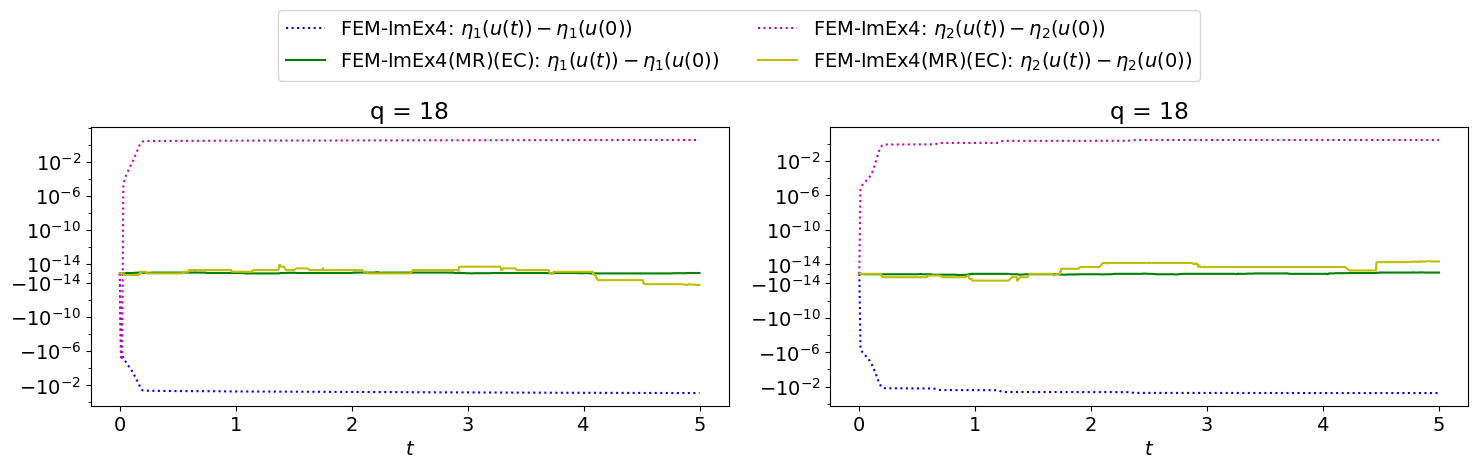

In [11]:
# plotting error invariants
# Font size    
font = {#'family' : 'normal',
'weight' : 'normal',
'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(15, 4))

for i in range(len(MR_EC_df['Mthds_MR_EC'])):
    plt.subplot(1,len(MR_EC_df['Mthds_MR_EC']),i+1)
    ncol = 2;
    plt.plot(B_tt[i],B_ETA_1[i],':b',label="FEM-%s: $\eta_{1}(u(t))-\eta_{1}(u(0))$"%(B_df['Mthds_B'][i]))
    plt.plot(MR_EC_tt[i],MR_EC_ETA_1[i],'-g',label="FEM-%s: $\eta_{1}(u(t))-\eta_{1}(u(0))$"%(MR_EC_df['Mthds_MR_EC'][i]))
    plt.plot(B_tt[i],B_ETA_2[i],':m',label="FEM-%s: $\eta_{2}(u(t))-\eta_{2}(u(0))$"%(B_df['Mthds_B'][i]))
    plt.plot(MR_EC_tt[i],MR_EC_ETA_2[i],'-y',label="FEM-%s: $\eta_{2}(u(t))-\eta_{2}(u(0))$"%(MR_EC_df['Mthds_MR_EC'][i]))
    plt.title('q = %d'%(q))
        
    plt.xlabel('$t$')
    plt.yscale("symlog", linthresh=1.e-14)
    plt.yticks([-1.e-2, -1.e-6, -1.e-10, -1.e-14, 1.e-14, 1.e-10, 1.e-6, 1.e-2])
    
plt.tight_layout()
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper center', ncol = ncol, bbox_to_anchor=(0.5, 1.2))
# plt.savefig('./Figures/%s/%s_VarSteps_FEM_MRRK_InvErrVsTime_tf%d.pdf'%(eqn,eqn,T),format='pdf', bbox_inches="tight",transparent=True)

In [12]:
for i in range(len(B_df['Mthds_B'])):
    print("FEM-%s: Max of density invariant error = %1.2e. \n"%(B_df['Mthds_B'][i],np.max(np.abs(B_ETA_1[i]))))
    print("FEM-%s: Max of energy invariant error = %1.2e. \n"%(B_df['Mthds_B'][i],np.max(np.abs(B_ETA_2[i]))))
    print("FEM-%s: Max of density invariant error = %1.2e. \n"%(MR_EC_df['Mthds_MR_EC'][i],np.max(np.abs(MR_EC_ETA_1[i]))))
    print("FEM-%s: Max of energy invariant error = %1.2e. \n"%(MR_EC_df['Mthds_MR_EC'][i],np.max(np.abs(MR_EC_ETA_2[i]))))

FEM-ImEx3: Max of density invariant error = 8.57e-02. 

FEM-ImEx3: Max of energy invariant error = 3.56e+00. 

FEM-ImEx3(MR)(EC): Max of density invariant error = 1.33e-15. 

FEM-ImEx3(MR)(EC): Max of energy invariant error = 1.78e-14. 

FEM-ImEx4: Max of density invariant error = 5.63e-02. 

FEM-ImEx4: Max of energy invariant error = 2.81e+00. 

FEM-ImEx4(MR)(EC): Max of density invariant error = 1.55e-15. 

FEM-ImEx4(MR)(EC): Max of energy invariant error = 2.31e-14. 



In [13]:
import os
path = './Figures/%s/'%eqn
if not os.path.exists(path):
   os.makedirs(path)

#### Plot: Solution error over time

In [14]:
MR_EC_ERR = []
for i in range(len(MR_EC_df['Mthds_MR_EC'])):
    comp_MR_EC_uu = MR_EC_uu[i][:,::2]+1j*MR_EC_uu[i][:,1::2]
    comp_MR_EC_uu_ex = np.array(MR_EC_uu_ex[i])[:,::2]+1j*np.array(MR_EC_uu_ex[i])[:,1::2]
    MR_EC_err = np.max(np.abs(np.array(comp_MR_EC_uu)-np.array(comp_MR_EC_uu_ex)),axis=1)
    MR_EC_ERR.append(MR_EC_err)
    
B_ERR = [];
for i in range(len(B_df['Mthds_B'])):
    comp_B_uu = B_uu[i][:,::2]+1j*B_uu[i][:,1::2]
    comp_B_uu_ex = np.array(B_uu_ex[i])[:,::2]+1j*np.array(B_uu_ex[i])[:,1::2]
    B_err = np.max(np.abs(np.array(comp_B_uu)-np.array(comp_B_uu_ex)),axis=1)
    B_ERR.append(B_err)

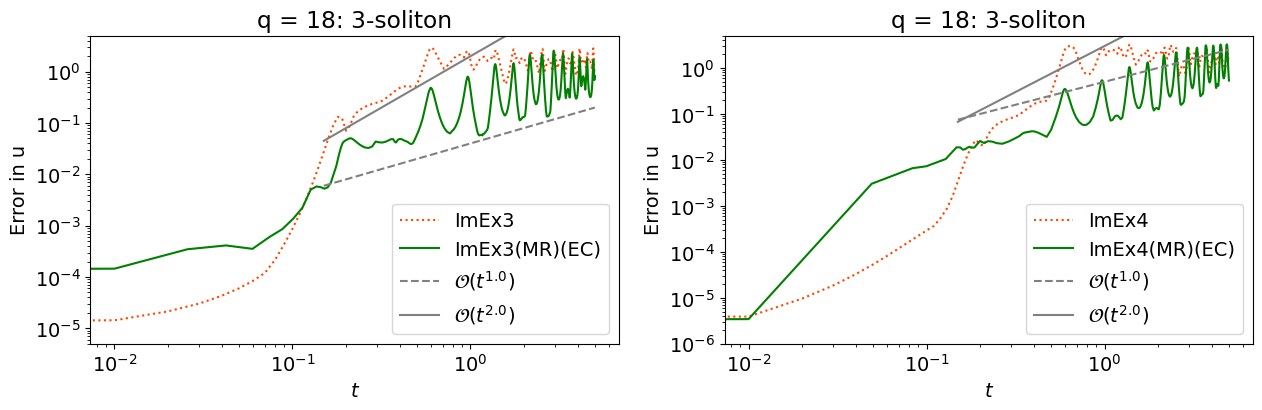

In [15]:
# Plotting error growth
if q == 8:
    sl2_cons_mult = [5e-2,1e-0]; sl2_p = [2,2]
    sl1_cons_mult = [1e-1,1e-1]; sl1_p = [1,1]
    slope_st_pt = [.5,.3]; slope_end_pt = [T,T]
    ylim_l = [1e-5,4e-5];  ylim_u = [5e0,4e-0]
elif q == 18:
    sl1_cons_mult = [4e-2,5e-1]; sl1_p = [1,1]
    sl2_cons_mult = [2e-0,3e-0]; sl2_p = [2,2]
    slope_st_pt = [.15,.15]; slope_end_pt = [T,T]
    ylim_l = [5e-6,1e-6]; ylim_u = [5e-0,5e-0]

# Font size    
font = {#'family' : 'normal',
'weight' : 'normal',
'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(15, 4))
idx3 = 0
for i in range(len(MR_EC_df['Mthds_MR_EC'])):
    plt.subplot(1,len(MR_EC_df['Mthds_MR_EC']),i+1)
    plt.plot(B_tt[i][idx3:],B_ERR[i][idx3:],':',color='orangered',label="%s"%(B_df['Mthds_B'][i]))
    plt.plot(MR_EC_tt[i][idx3:],MR_EC_ERR[i][idx3:],'-g',label="%s"%(MR_EC_df['Mthds_MR_EC'][i]))
    
    sl_b = np.linspace(slope_st_pt[i],slope_end_pt[i],100)
    sl_r = np.linspace(slope_st_pt[i],slope_end_pt[i],100)
    plt.plot(sl_r,sl1_cons_mult[i]*sl_r**sl1_p[i],'--',color='0.5',label="$\mathcal{O}(t^{%1.1f})$"%(sl1_p[i]))
    plt.plot(sl_b,sl2_cons_mult[i]*sl_b**sl2_p[i],'-',color='0.5',label="$\mathcal{O}(t^{%1.1f})$"%(sl2_p[i]))
    
    plt.xlabel('$t$')
    plt.ylabel('Error in u')
    plt.xscale("log"); plt.yscale("log")
    plt.ylim((ylim_l[i], ylim_u[i]))
    plt.title('q = %d: %d-soliton'%(q,sol))
    plt.legend()
    
plt.savefig('./Figures/%s/%s_FEM_ImEx_SolErrVsTime_tf%d.pdf'%(eqn,eqn,T),format='pdf', bbox_inches="tight",transparent=True)

#### Solution comparison 

FEM-ImEx4 time = 4.3000 

FEM-ImEx4(MR) time = 4.2990 

SP-S2 time = 4.3000 

SP-AK4 time = 4.3000 



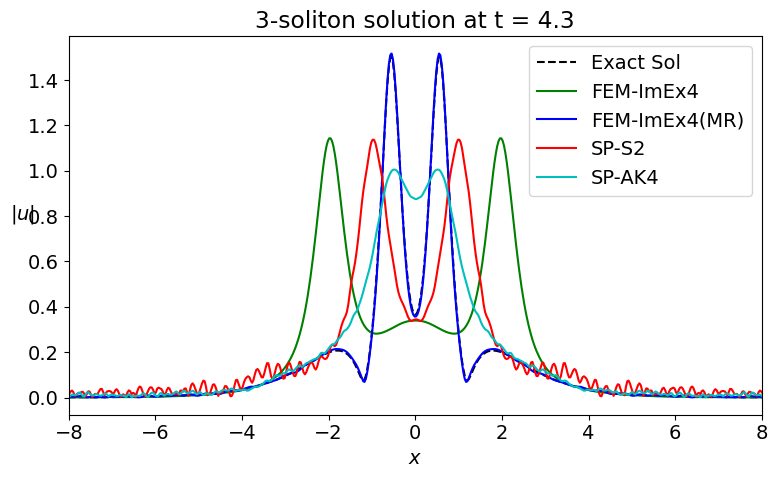

In [16]:
# Change idx1 to plot solutions by different methods
idx1 = 1; dt = B_df['B: dt'][idx1]
NLS_b_tt = B_tt[idx1]; NLS_b_uu = Mod_B_uu[idx1]; b_uexact = Mod_B_uu_ex[idx1]
NLS_dr_tt = MR_tt[idx1]; NLS_dr_uu = Mod_MR_uu[idx1]

# Font size    
font = {#'family' : 'normal',
'weight' : 'normal',
'size'   : 14}
plt.rc('font', **font)
#================================================================================#
if q == 8:
    # 2-soliton solution 
    t = 4.3; idx2 = int(t/dt)+1;
    #--------------------------#
    print("FEM-%s time = %1.4f \n"%(B_df['Mthds_B'][idx1],B_tt[idx1][idx2]))
    print("FEM-%s time = %1.4f \n"%(MR_df['Mthds_MR'][idx1],MR_tt[idx1][idx2-1]))
    print("SP-%s time = %1.4f \n"%(SP_df['Mthds_SP'][0],SP_tt[idx1][idx2]))
    print("SP-%s time = %1.4f \n"%(SP_df['Mthds_SP'][1],SP_tt[idx1][idx2]))


    fig = plt.figure(figsize=(8,5))
    plt.plot(x, b_uexact[idx2],'--k',label="Exact Sol")
    plt.plot(x, NLS_b_uu[idx2],'-g', label="FEM-%s"%(B_df['Mthds_B'][idx1]))
    plt.plot(x, NLS_dr_uu[idx2-1],'-b', label="FEM-%s"%(MR_df['Mthds_MR'][idx1]))
    plt.plot(x,np.abs(SP_uu[0][idx2][:N]+1j*SP_uu[0][idx2][N:]),'-r',label="SP-%s"%(SP_df['Mthds_SP'][0]))
    plt.plot(x,np.abs(SP_uu[1][idx2][:N]+1j*SP_uu[1][idx2][N:]),'-c',label="SP-%s"%(SP_df['Mthds_SP'][1]))
    plt.title("%d-soliton solution at t = %1.1f"%(sol,t))
    plt.legend()
    plt.xlabel('$x$'); plt.ylabel('$|u|$',rotation=0); plt.xlim(-8,8)
    fig.tight_layout()

elif q == 18:
    # 3-soliton solution
    t = 4.3; idx2 = int(t/dt); 
    #--------------------------#
    print("FEM-%s time = %1.4f \n"%(B_df['Mthds_B'][idx1],B_tt[idx1][idx2]))
    print("FEM-%s time = %1.4f \n"%(MR_df['Mthds_MR'][idx1],MR_tt[idx1][idx2-1]))
    print("SP-%s time = %1.4f \n"%(SP_df['Mthds_SP'][0],SP_tt[idx1][idx2]))
    print("SP-%s time = %1.4f \n"%(SP_df['Mthds_SP'][1],SP_tt[idx1][idx2]))

    fig = plt.figure(figsize=(8,5))
    plt.plot(x, b_uexact[idx2],'--k',label="Exact Sol")
    plt.plot(x, NLS_b_uu[idx2],'-g', label="FEM-%s"%(B_df['Mthds_B'][idx1]))
    plt.plot(x, NLS_dr_uu[idx2-1],'-b', label="FEM-%s"%(MR_df['Mthds_MR'][idx1]))
    plt.plot(x,np.abs(SP_uu[0][idx2][:N]+1j*SP_uu[0][idx2][N:]),'-r',label="SP-%s"%(SP_df['Mthds_SP'][0]))
    plt.plot(x,np.abs(SP_uu[1][idx2][:N]+1j*SP_uu[1][idx2][N:]),'-c',label="SP-%s"%(SP_df['Mthds_SP'][1]))
    plt.title("%d-soliton solution at t = %1.1f"%(sol,t))
    plt.legend()
    plt.xlabel('$x$'); plt.ylabel('$|u|$',rotation=0); plt.xlim(-8,8)
    fig.tight_layout()
#================================================================================#

plt.savefig('./Figures/%s/%s_FEM_SP_Sol_Comp_t_%1.2f.pdf'%(eqn,eqn,t),format='pdf', bbox_inches="tight",transparent=True)
